In [40]:
import numpy
import matplotlib
from matplotlib import pyplot
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

/Users/ih3/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [19]:
%matplotlib inline

In [20]:
matplotlib.rcParams['font.size'] = 16

In [26]:
v = 1
t_end = 0.2
x = numpy.linspace(0, 1, 1000)
t = numpy.linspace(0, t_end, 1000)

q0 = numpy.sin(2 * numpy.pi * x)
q1_advection = numpy.sin(2 * numpy.pi * (x - v * t_end))
q1_burgers = numpy.where(x < 0.5, x, x - 1) # Not true; is it enough for illustration?
char_x_t0 = numpy.linspace(-1, 1, 41)
char_x_t1_advection = char_x_t0 + v * t_end
char_x_t1_burgers = char_x_t0 + numpy.sin(2 * numpy.pi * char_x_t0) * t_end

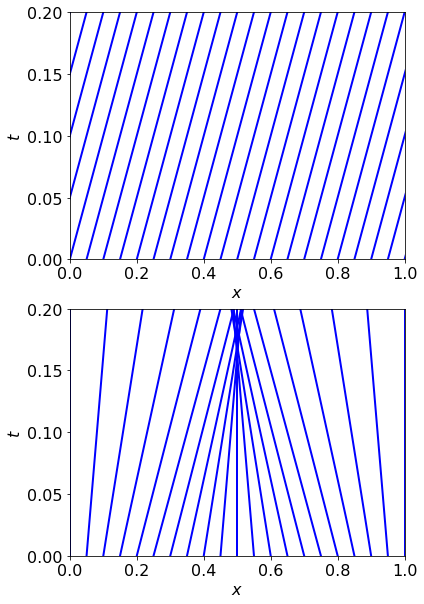

In [27]:
fig, axes = pyplot.subplots(2, 1, figsize=(6, 10))
for i in range(len(char_x_t0)):
    axes[0].plot([char_x_t0[i], char_x_t1_advection[i]], [0, t_end], lw=2, color='b')
    axes[1].plot([char_x_t0[i], char_x_t1_burgers[i]], [0, t_end], lw=2, color='b')
for ax in axes:
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$t$")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, t_end)

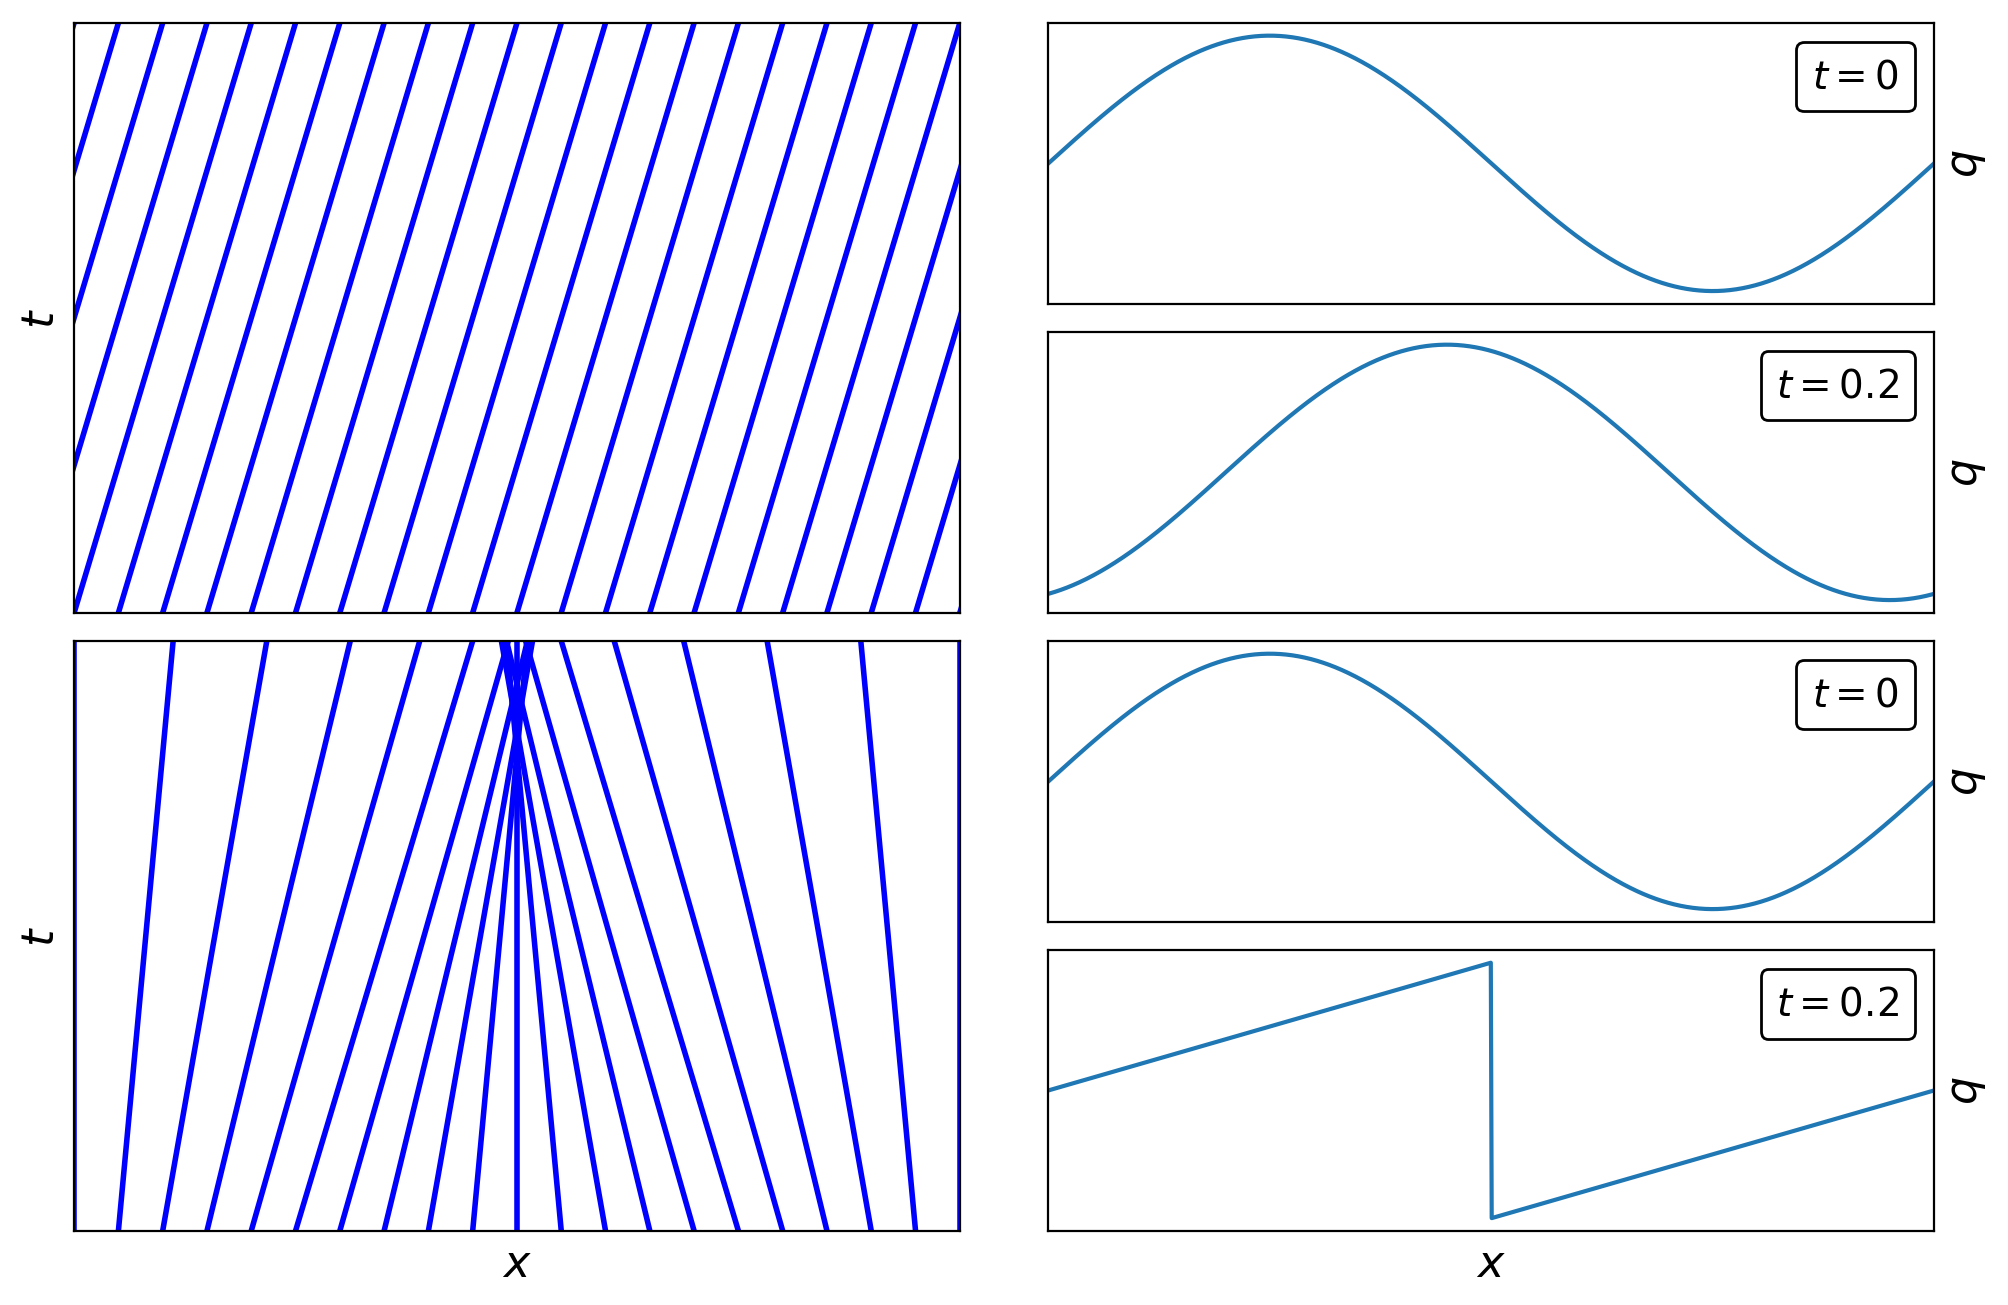

In [44]:
widths = [1, 1]
heights = [1, 1, 1, 1]
fig = pyplot.figure(constrained_layout=False, figsize=(12, 8), dpi=200)
gs = fig.add_gridspec(4, 2, width_ratios=widths, height_ratios=heights,
                      hspace=0.1, wspace=0.1)
# fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.01, hspace=0.01, wspace=0.01)

ax_char = [fig.add_subplot(gs[:2, 0]), fig.add_subplot(gs[2:, 0])]
for i in range(len(char_x_t0)):
    ax_char[0].plot([char_x_t0[i], char_x_t1_advection[i]], [0, t_end], lw=2, color='b')
    ax_char[1].plot([char_x_t0[i], char_x_t1_burgers[i]], [0, t_end], lw=2, color='b')
for i, ax in enumerate(ax_char):
    if i == 1:
        ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$t$")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, t_end)
    ax.set_xticks([])
    ax.set_yticks([])

axes = []
for i in range(4):
    axes.append(fig.add_subplot(gs[i, 1]))

axes[0].plot(x, q0)
axes[1].plot(x, q1_advection)
axes[2].plot(x, q0)
axes[3].plot(x, q1_burgers)
for i, ax in enumerate(axes):
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r"$q$")
    ax.yaxis.set_label_position("right")
    if i == 3:
        ax.set_xlabel(r"$x$")
    if i in [0, 2]:
        at = AnchoredText(r"$t=0$",
                          prop=dict(size=14), frameon=True,
                          loc=1,
                          )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
    else:
        at = AnchoredText(rf"$t={t_end}$",
                          prop=dict(size=14), frameon=True,
                          loc=1,
                          )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
pyplot.savefig("characteristics.png", bbox_inches="tight")